In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing Packages
import cv2
import numpy as np
import plotly.express as px

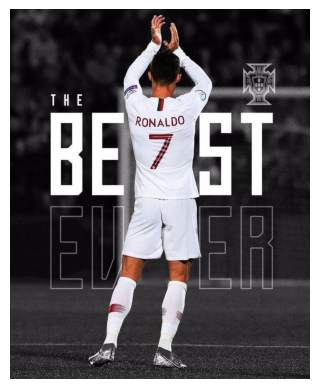

In [20]:
#Loading Images
import cv2
import os
import matplotlib.pyplot as plt

# Specify the absolute path to the image file
image_path = os.path.abspath("C:/Users/nikea/OneDrive/Desktop/LGM/not mine/LGMVIP-DataScience/Task 04-Image to Pencil Sketch with Python/Image/ronaldo.jpg")

# Load the image
img = cv2.imread(image_path)

if img is not None:
    # Convert image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()
else:
    print("Error: Image not loaded.")


In [21]:
#Resizing image shape
scale_percent = 0.60
width = int(img.shape[1]*scale_percent)
height = int(img.shape[0]*scale_percent)
dim = (width,height)
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
res=px.imshow(resized)
res.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
res.show()

In [17]:
#Sharpening Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)
sharp=px.imshow(sharpened)
sharp.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sharp.show()

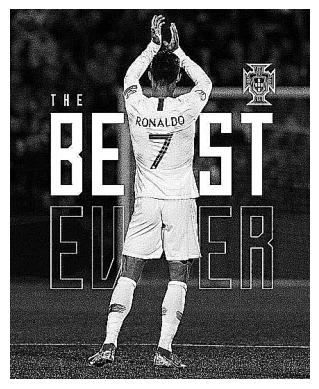

In [24]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
grayscale = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(grayscale, cmap='gray')
plt.axis('off')
plt.show()


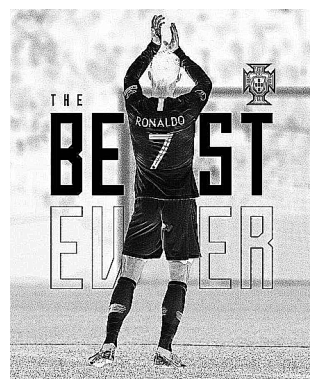

In [26]:
import cv2
import matplotlib.pyplot as plt

# Convert the image to grayscale
grayscale = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image
inverted = 255 - grayscale

# Display the inverted grayscale image using matplotlib
plt.imshow(inverted, cmap='gray')
plt.axis('off')
plt.show()


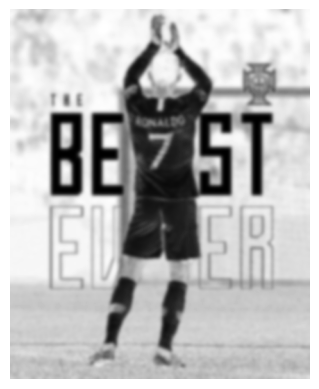

In [27]:
import cv2
import matplotlib.pyplot as plt

# Invert the grayscale image
inverted = 255 - grayscale

# Apply Gaussian smoothing
gauss = cv2.GaussianBlur(inverted, ksize=(15, 15), sigmaX=0, sigmaY=0)

# Display the smoothed image using matplotlib
plt.imshow(gauss, cmap='gray')
plt.axis('off')
plt.show()


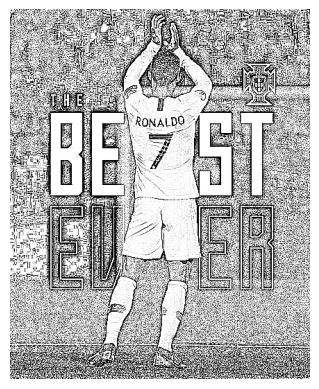

In [30]:
import cv2
import matplotlib.pyplot as plt

def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

pencil_img = dodgeV2(grayscale, gauss)

# Display the sketch using matplotlib
plt.imshow(pencil_img, cmap='gray')
plt.axis('off')
plt.show()
